In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy


In [ ]:

#Particle class
class Particle:
    direction=[]
    position=[]
    def __init__(self,n_dimensions, b_low, b_high, v_init):
        self.direction = np.random.uniform(-1,1,n_dimensions)
        self.position = np.random.uniform(b_low,b_high,n_dimensions)
        self.velocity = v_init*np.ones(n_dimensions)
#initialize particles
def init_particles(n_particles, n_dimensions, b_low, b_high, v_init):
    P=[]    
    for i in range(n_particles):
        p = Particle(n_dimensions, b_low,b_high, v_init)
        P.append(p)
    return np.array(P)
#evaluate method, this one calculates particle's distance from 0,0,0
def evaluate(p):
    # for now calculate euclidean distance to 0,0,0....
    global_minimum = np.zeros(len(p.position))
    loss = np.linalg.norm(global_minimum-p.position)
    #print("dist: ",loss, "position :",p.position)
    return loss
#find the best particle in the population
def find_best(P):
    loss_best = 100000#evaluate(P[0])
    p_best = P[0]
    for p in P:
        loss = evaluate(p)
        if loss < loss_best:
            loss_best = copy.copy(loss)
            p_best = copy.copy(p)
    #print("dist: ", loss_best)
    return copy.copy(p_best), copy.copy(loss_best)
#compute v_init
def initial_velocity(b_low, b_high, n_dimensions, beta):
    v_init = (np.sum(b_high -b_low)/n_dimensions) * beta
    return v_init
#compute r
def collision_radius(b_low, b_high, n_dimensions, alpha):
    r=(np.sum(b_high-b_low)/n_dimensions) *alpha
    return r
#update the particles in P
def update_particles(P,b_low, b_high, v_init,r,p_best,k,gen,ro,H):
    new_P=[]
    #compute the gravitational pull towards the best particle
    for i, p in enumerate(P):
        dist=np.linalg.norm(p_best.position-p.position)
        if dist==0:
            a_i=0
            #print('current best')
        else:
            a_i=(p_best.position - p.position)/np.linalg.norm(p_best.position-p.position)
        #update direction, velocity and position    
        p.direction=p.direction*(1-(k/gen))*0.5 +a_i
        p.velocity=p.direction*v_init
        p.position = p.position + p.velocity*np.random.uniform(0,1,len(p.position))*ro*(b_high-b_low)

        new_P.append(copy.deepcopy(p))
    #solve collisions
    for i, p_i in enumerate(P):
        for j, p_j in enumerate(P):
            if j>i and np.linalg.norm(p_i.position-p_j.position) < r:
                #change directions
                temp = p_i.direction
                p_i.direction=p_j.direction
                p_j.direction=temp
    #random positions
    for i,p in enumerate(P):
        r_m=np.random.uniform(0,1)
        if r_m<H:
            p.position = np.random.uniform(b_low,b_high, len(p.position))

    return new_P

def States_of_Matter_Search():
    #set hyperparameters
    N_p=100
    n_dimensions=2
    #amount of generations
    gen=100
    #state parameters for gas state
    ro=0.8#.8
    alpha = 0.0008
    beta = 0.8
    H=0.9
    
    positions=np.zeros((gen,n_dimensions))
    directions=np.zeros((gen,n_dimensions))
    velocities=np.zeros((gen, n_dimensions))
    #boundaries
    b_low = -3
    b_high= 3
    
    v_init = initial_velocity(b_low, b_high, n_dimensions, beta)
    r=collision_radius(b_low, b_high, n_dimensions, alpha)
    #initialize particles
    P= init_particles(N_p,n_dimensions,b_low, b_high, v_init)
    #initialize global best
    p_best_of_best, loss_best_of_best=find_best(P)
    #enter algorithm loop
    for k in range(gen):
        v_init = initial_velocity(b_low, b_high, n_dimensions, beta)
        r=collision_radius(b_low, b_high, n_dimensions, alpha)
        #set state parameters for liquid state
        if k==int(0.5*gen):
            ro=0.3
            alpha=0.2
            beta=0.4
            H=0.2
            print("transition to liquid state")
        #set state parameters for solid state
        if k==int(0.9*gen):
            ro=0.1
            alpha=0
            beta=0.1
            H=0
            print("transition to solid state")
        p_best, loss_best=find_best(P)
        if loss_best<loss_best_of_best:
            p_best_of_best = copy.copy(p_best)
            loss_best_of_best = copy.copy(loss_best)
        
        print("distance: ", loss_best_of_best, loss_best)
        P=update_particles(P,b_low, b_high, v_init, r, p_best_of_best, k, gen, ro, H)
        positions[k]=P[0].position
        directions[k]=P[0].direction
        velocities[k]=loss_best_of_best
    return p_best_of_best, loss_best_of_best, positions, directions, velocities

p,l,pos,d,v = States_of_Matter_Search()
#global best distance and current population best distance

distance:  0.18799881971748583 0.18799881971748583
distance:  0.18799881971748583 0.25663525051081715
distance:  0.18799881971748583 0.575538374324859
distance:  0.18799881971748583 0.26736534056043376
distance:  0.18799881971748583 0.44301784260244137
distance:  0.18799881971748583 0.20472308021560823
distance:  0.18799881971748583 0.21873298784938336
distance:  0.18799881971748583 0.37868631270133407
distance:  0.18799881971748583 0.19359770888103392
distance:  0.18799881971748583 0.6650680305052324
distance:  0.18799881971748583 0.31657463261475755
distance:  0.07410660370100437 0.07410660370100437
distance:  0.07410660370100437 0.14862595040368987
distance:  0.07410660370100437 0.21725113673640933
distance:  0.030902469166268355 0.030902469166268355
distance:  0.030902469166268355 0.24156154364802893
distance:  0.030902469166268355 0.1304685753593179
distance:  0.030902469166268355 0.04729964270942792
distance:  0.030902469166268355 0.050895380050613455
distance:  0.030902469166268

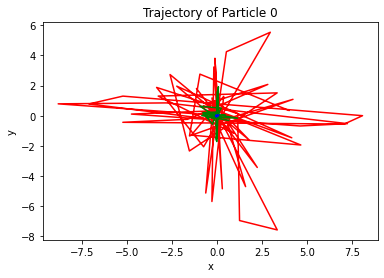

In [ ]:
plt.figure()
plt.plot(pos[0:50,0], pos[0:50,1], color='red')
plt.plot(pos[50:90,0], pos[50:90,1], color='green')
plt.plot(pos[90:100,0], pos[90:100,1], color='blue')
#plt.scatter(pos[:,0], pos[:,1])
#plt.scatter(pos[0,0], pos[0,1])
plt.scatter(pos[99,0], pos[99,1])
plt.title('Trajectory of Particle 0')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

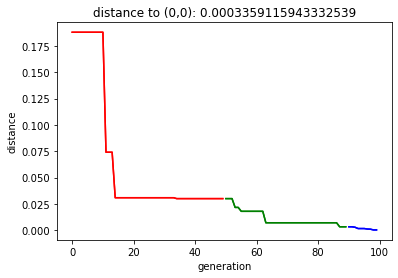

In [ ]:
plt.figure()
x=np.arange(0,100)
plt.plot(x[0:50], v[0:50], color='red')
plt.plot(x[50:90], v[50:90], color='green')
plt.plot(x[90:100], v[90:100], color='blue')
#plt.scatter(pos[:,0], pos[:,1])
#plt.scatter(pos[0,0], pos[0,1])

plt.title('distance to (0,0): '+str(l))
plt.xlabel('generation')
plt.ylabel('distance')

plt.show()


In [ ]:
#Now for the real application with the neural network

#As this notebook is only meant as proof that the code is executable we only run with 1 generation and 2 particles  for SMS and 1 epoch for SGD as Colab is very slow

In [1]:
import sys
import numpy as np
import cv2
import sklearn.metrics as sklm
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras import backend as K
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import optimizers
import copy
import pickle

print(tf.__version__)



2.5.0


In [2]:

pcam, pcam_info = tfds.load('patch_camelyon', with_info = True, as_supervised = True)
#print(pcam_info)

train_data1 = pcam['train']
valid_data1 = pcam['validation']
test_data1 = pcam['test']


Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteALVT6Z/patch_camelyon-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteALVT6Z/patch_camelyon-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteALVT6Z/patch_camelyon-validation.tfrecord


Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


In [9]:

def pretrained_model_last(img_shape, num_classes, layer_type):
  #vgg16 = VGG16(weights=None, include_top=True)
  vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=img_shape)

  #print(vgg16.trainable_variables)

  for layer in vgg16.layers:
    if layer.name == 'block5_conv3':
      break
    layer.trainable = False

  last = vgg16.layers[-1].output
  print(last.shape)
  x = Flatten(name='flatten')(last)
  x = Dense(2, activation=layer_type, name='predictions')(x)
  
  pretrained_model = Model(inputs=vgg16.input, outputs=x)
  layer_last = pretrained_model.layers[-1]
  print("----")
  print(np.array(layer_last.get_weights()))

  a = np.array(layer_last.get_weights())
  nrow = len(a)
  if len(a) != 0:
    ncol = len(a[0])
    ncol1 = len(a[1])
    print(nrow, ncol, ncol1)

  pretrained_model.summary()

  return pretrained_model

def preprocess(image, labels):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, labels


class Particle:
    direction=[]
    position=[]
    
    def __init__(self,n_dimensions, b_low, b_high, v_init):
        self.direction = np.random.uniform(-1,1,n_dimensions)
        self.position = np.random.uniform(b_low,b_high,n_dimensions)
        self.velocity = v_init*np.ones(n_dimensions)

def init_particles(n_particles, n_dimensions, b_low, b_high, v_init):
    P=[]
    
    
    for i in range(n_particles):
        p = Particle(n_dimensions, b_low,b_high, v_init)
        P.append(p)
    return np.array(P)

#new functions that adapt SMS for neural network

def evaluate(p, model, data, labels):

    weights=[np.reshape(p.position[0:9216],(4608,2)), np.array([0,0])]
    model.layers[-1].set_weights(weights)
    loss, acc = model.evaluate(data, labels)   
    
    return acc

def find_best(P, model,data, labels):
    loss_best = 0
    for p in P:
        
        loss = evaluate(p, model, data, labels)
        if loss > loss_best:
            loss_best = copy.copy(loss)
            p_best = copy.copy(p)
    return copy.copy(p_best), copy.copy(loss_best)

def initial_velocity(b_low, b_high, n_dimensions, beta):
    v_init = (np.sum(b_high -b_low)/n_dimensions) * beta
    return v_init

def collision_radius(b_low, b_high, n_dimensions, alpha):
    r=(np.sum(b_high-b_low)/n_dimensions) *alpha
    return r

def update_particles(P,b_low, b_high, v_init,r,p_best,k,gen,ro,H):
    new_P=[]
    #update particles   
    for i, p in enumerate(P):
        dist=np.linalg.norm(p_best.position-p.position)
        if dist==0:
            a_i=0
            #print('current best')
        else:
            a_i=(p_best.position - p.position)/np.linalg.norm(p_best.position-p.position)
        p.direction=p.direction*(1-(k/gen))*0.5 +a_i
        p.velocity=p.direction*v_init
        p.position = p.position + p.velocity*np.random.uniform(0,1,len(p.position))*ro*(b_high-b_low)
        new_P.append(copy.deepcopy(p))
    #solve collisions
    for i, p_i in enumerate(new_P):
        for j, p_j in enumerate(new_P):
            if j>i and np.linalg.norm(p_i.position-p_j.position) < r:
                temp = p_i.direction
                p_i.direction=p_j.direction
                p_j.direction=temp

    #random positions
    for i,p in enumerate(new_P):
        r_m=np.random.uniform(0,1)
        if r_m<H:
            p.position = np.random.uniform(b_low,b_high, len(p.position))

    return new_P

def States_of_Matter_Search(data, train_images, train_labels_hot):
    model = pretrained_model_last(img_shape=input_img, num_classes=2, layer_type='softmax') #Input(shape=())
    model.compile(optimizer= optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])
    N_p=2
    n_dimensions=model.layers[-1].get_weights()[0].shape[0]*model.layers[-1].get_weights()[0].shape[1] + model.layers[-1].get_weights()[1].shape[0]
    gen=1
    #state parameters for gas state
    ro=0.8
    alpha = 0.8
    beta = 0.8
    H=0.9
    #no real boundaries for weights, He initialization says random dist with mean 0 and std sqrt(2/n), take 3*std as realistic range (but sample uniform as specified)
    b_low = -0.3*np.ones(n_dimensions)
    b_high = 0.3*np.ones(n_dimensions)
    
    v_init = initial_velocity(b_low, b_high, n_dimensions, beta)
    r=collision_radius(b_low, b_high, n_dimensions, alpha)
    print(v_init, r)
    P= init_particles(N_p,n_dimensions,b_low, b_high, v_init)
    p_best_of_best, loss_best_of_best=find_best(P, model, train_images, train_labels_hot)

    for k in range(gen):
        v_init = initial_velocity(b_low, b_high, n_dimensions, beta)
        r=collision_radius(b_low, b_high, n_dimensions, alpha)
        #set state parameters for liquid state
        if k==int(0.5*gen):
            ro=0.5
            alpha=0.2
            beta=0.4
            H=0.2
            print("transition to liquid state")
        #set state parameters for solid state
        if k==int(0.9*gen):
            ro=0.1
            alpha=0
            beta=0.1
            H=0
            print("transition to solid state")
        p_best, loss_best=find_best(P, model, train_images, train_labels_hot)
        if loss_best>loss_best_of_best:
            p_best_of_best = copy.copy(p_best)
            loss_best_of_best = copy.copy(loss_best)
        print("Best until now: ", evaluate(p_best_of_best, model, train_images, train_labels_hot), "Best of current population: ", loss_best)
        P=update_particles(P,b_low, b_high, v_init, r, p_best_of_best, k, gen, ro, H)
    return p_best_of_best, loss_best_of_best,model
    


In [5]:
train_data = train_data1.map(preprocess)
valid_data = valid_data1.map(preprocess)
test_data = test_data1.map(preprocess)

buffer_size = 1000
train_data = train_data.shuffle(buffer_size)
batch_size = 1000
train_data = train_data.batch(batch_size).prefetch(1)
valid_data = valid_data.batch(batch_size).prefetch(1)
test_data = test_data.batch(batch_size).prefetch(1)


#Seperating image and label into different variables
train_images, train_labels = next(iter(train_data))
valid_images, valid_labels = next(iter(valid_data))
test_images, test_labels  = next(iter(test_data))

test_labels_hot = tf.one_hot(test_labels, 2)
train_labels_hot = tf.one_hot(train_labels, 2)
valid_labels_hot = tf.one_hot(valid_labels,2)
#Checking the label shape
print(valid_labels.shape)

#Checking the image shape
print(train_images.shape)
input_img = (96,96,3)
model = pretrained_model_last(img_shape=input_img, num_classes=2, layer_type='softmax') #Input(shape=())
model.compile(optimizer= optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

(1000,)
(1000, 96, 96, 3)
58900480/58889256 [==============================] - 1s 0us/step
(None, 3, 3, 512)
----
[array([[-0.01759187,  0.00332054],
       [-0.02234894, -0.00911674],
       [-0.01773269, -0.03168698],
       ...,
       [-0.00938446, -0.02476277],
       [-0.00575327,  0.02381014],
       [ 0.00708461, -0.01196118]], dtype=float32)
 array([0., 0.], dtype=float32)]
2 4608 2
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [10]:
p,l,model=States_of_Matter_Search(train_data, train_images, train_labels_hot)


(None, 3, 3, 512)
----
[array([[-0.02141432,  0.02661307],
       [-0.00807578,  0.00635443],
       [ 0.00461402,  0.03244717],
       ...,
       [ 0.01709148,  0.01913401],
       [-0.0147036 ,  0.025188  ],
       [-0.01048876,  0.02697781]], dtype=float32)
 array([0., 0.], dtype=float32)]
2 4608 2
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


32/32 [==============================] - 99s 3s/step - loss: 3.0678 - acc: 0.3570
transition to liquid state
transition to solid state
32/32 [==============================] - 92s 3s/step - loss: 4.1944 - acc: 0.5010
Best until now:  0.5009999871253967 Best of current population:  0.5009999871253967


In [11]:
weights=[np.reshape(p.position[0:9216],(4608,2)), np.array([0,0])]#np.array(p.position[128:130])]
model.layers[-1].set_weights(weights)
loss, acc = model.evaluate(test_images, test_labels_hot)

print(loss, acc)

32/32 [==============================] - 99s 3s/step - loss: 4.0615 - acc: 0.5290
4.061456680297852 0.5289999842643738


In [12]:
#compare with a second model trained with SGD

model2 = pretrained_model_last(img_shape=input_img, num_classes=2, layer_type='softmax') #Input(shape=())
model2.compile(optimizer= optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])
model2.fit(train_images, train_labels_hot, batch_size=100, epochs=1)
loss, acc = model2.evaluate(test_images, test_labels_hot)
print(loss,acc)

(None, 3, 3, 512)
----
[array([[ 0.02871241,  0.0076516 ],
       [-0.03543505, -0.01313855],
       [ 0.01315647,  0.00525743],
       ...,
       [-0.02959113, -0.0206939 ],
       [-0.01973355, -0.01745848],
       [ 0.03406789,  0.03313718]], dtype=float32)
 array([0., 0.], dtype=float32)]
2 4608 2
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


32/32 [==============================] - 93s 3s/step - loss: 0.5572 - acc: 0.7470
0.5571846961975098 0.746999979019165
